# San Diego Departure Taxi Time Analysis 

## 1. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SAN_flights = pd.read_csv('flight_data_SAN.csv')

In [3]:
SAN_flights.head()

,airline,flightno,origin,dest,totalseatcount,generalacft,depgate,arrgate,scheduled_departure_dttm,scheduled_arrival_dttm,actual_departure_dttm,actual_arrival_dttm,airtime,taxiout,taxiin,depvariance,arrvariance,internationalflag
0,AC,1886,SAN,YYZ,174,32S,034,F36,2018-01-01 11:40:00,2018-01-01 19:11:00,2018-01-01 13:03:00,2018-01-01 21:14:00,251.0,34.0,26.0,83.0,123.0,1
1,WN,6418,SAN,TUS,143,737,8,A3,2018-01-01 21:55:00,2018-01-02 00:10:00,2018-01-01 22:30:00,2018-01-02 00:36:00,50.0,12.0,4.0,35.0,26.0,0
2,AS,3456,SAN,STL,76,EMJ,18,C15,2018-01-01 09:40:00,2018-01-01 15:02:00,2018-01-01 09:37:00,2018-01-01 15:04:00,189.0,14.0,4.0,-3.0,2.0,0
3,WN,552,SAN,SMF,143,737,8,B15,2018-01-01 19:10:00,2018-01-01 20:45:00,2018-01-01 19:53:00,2018-01-01 21:19:00,67.0,15.0,4.0,43.0,34.0,0
4,WN,983,SAN,SMF,143,737,1A,B17,2018-01-01 15:05:00,2018-01-01 16:40:00,2018-01-01 15:15:00,2018-01-01 16:43:00,70.0,14.0,4.0,10.0,3.0,0


In [4]:
SAN_flights.shape

(188525, 18)

In [5]:
# Check for duplicates
duplicateRowsDF = SAN_flights[SAN_flights.duplicated()]
duplicateRowsDF

,airline,flightno,origin,dest,totalseatcount,generalacft,depgate,arrgate,scheduled_departure_dttm,scheduled_arrival_dttm,actual_departure_dttm,actual_arrival_dttm,airtime,taxiout,taxiin,depvariance,arrvariance,internationalflag


In [6]:
SAN_flights.isnull().sum()

airline                        0
flightno                       0
origin                         0
dest                           0
totalseatcount                 0
generalacft                  162
depgate                     3438
arrgate                     6321
scheduled_departure_dttm       0
scheduled_arrival_dttm         0
actual_departure_dttm        313
actual_arrival_dttm          400
airtime                     1266
taxiout                     1112
taxiin                      1594
depvariance                  313
arrvariance                  409
internationalflag              0
dtype: int64

In [7]:
SAN_flights.dropna(inplace = True)

In [8]:
SAN_flights.shape

(180742, 18)

In [9]:
taxidata = ['taxiout', 'taxiin']
SAN_flights[taxidata].describe()

,taxiout,taxiin
count,180742.000000,180742.000000
mean,16.540920,7.930431
std,7.518253,6.247987
min,0.000000,1.000000
25%,12.000000,5.000000
50%,15.000000,6.000000
75%,20.000000,9.000000
max,1039.000000,349.000000


<Axes: xlabel='taxiin', ylabel='Count'>

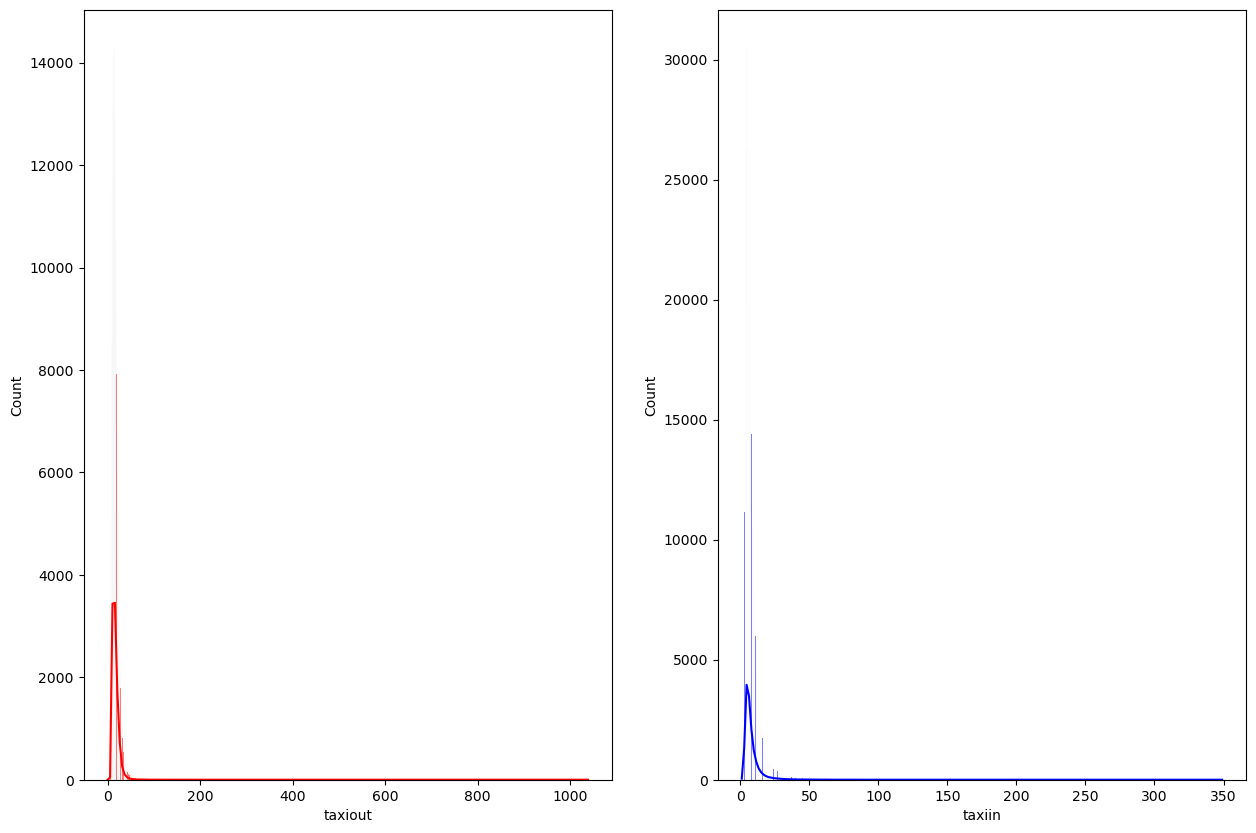

In [10]:
fig, axs = plt.subplots(1,2, figsize=(15, 10))
sns.histplot(data=SAN_flights, x='taxiout', kde=True, color='red',  ax=axs[0])
sns.histplot(data=SAN_flights, x='taxiin', kde=True, color='blue',  ax=axs[1])

In [11]:
(SAN_flights['taxiout'] == SAN_flights['taxiout'].min()).sum()

3

In [12]:
(SAN_flights['taxiin'] == SAN_flights['taxiin'].min()).sum()

86

In [13]:
SAN_flights = SAN_flights.drop(SAN_flights[SAN_flights['taxiout'] == SAN_flights['taxiout'].max()].index)
SAN_flights = SAN_flights.drop(SAN_flights[SAN_flights['taxiin'] == SAN_flights['taxiin'].max()].index)

In [14]:
SAN_flights = SAN_flights.drop(SAN_flights[SAN_flights['taxiout'] == SAN_flights['taxiout'].min()].index)
# SAN_flights = SAN_flights.drop(SAN_flights[SAN_flights['taxiin'] == SAN_flights['taxiin'].max()].index)

In [15]:
SAN_flights.shape

(180737, 18)

<Axes: xlabel='taxiin', ylabel='Count'>

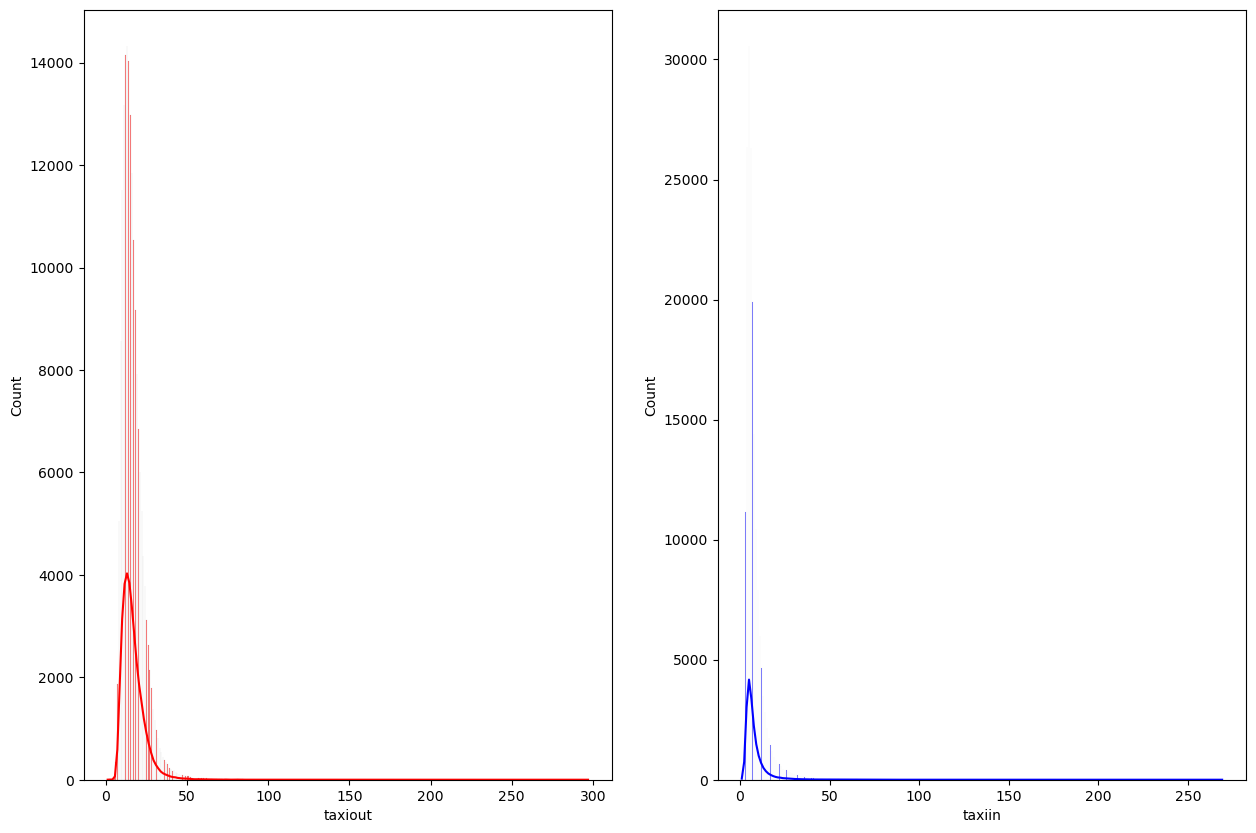

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15, 10))
sns.histplot(data=SAN_flights, x='taxiout', kde=True, color='red',  ax=axs[0])
sns.histplot(data=SAN_flights, x='taxiin', kde=True, color='blue',  ax=axs[1])

<Axes: ylabel='taxiin'>

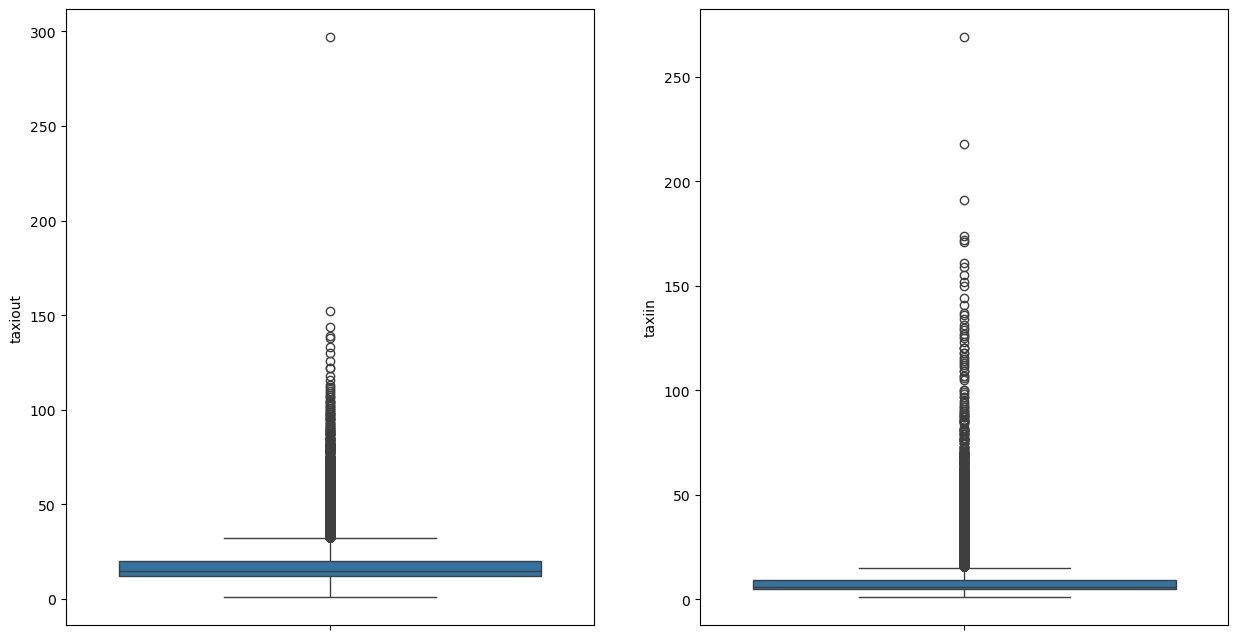

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,8))

sns.boxplot(SAN_flights['taxiout'], ax=axs[0])
sns.boxplot(SAN_flights['taxiin'], ax=axs[1])

In [18]:

p25 = SAN_flights['taxiout'].quantile(0.25)
p50 = SAN_flights['taxiout'].quantile(0.50)
p75 = SAN_flights['taxiout'].quantile(0.75)

iqr = p75-p25
min_val = p25 - 1.5*iqr
max_val = p75 + 1.5*iqr

outliers = SAN_flights[(SAN_flights['taxiout']<min_val) | (SAN_flights['taxiout']>max_val)]


In [19]:
outliers

,airline,flightno,origin,dest,totalseatcount,generalacft,depgate,arrgate,scheduled_departure_dttm,scheduled_arrival_dttm,actual_departure_dttm,actual_arrival_dttm,airtime,taxiout,taxiin,depvariance,arrvariance,internationalflag
0,AC,1886,SAN,YYZ,174,32S,034,F36,2018-01-01 11:40:00,2018-01-01 19:11:00,2018-01-01 13:03:00,2018-01-01 21:14:00,251.0,34.0,26.0,83.0,123.0,1
11,WN,1879,SAN,SJC,143,737,11,19,2018-01-01 06:20:00,2018-01-01 07:50:00,2018-01-01 06:20:00,2018-01-01 08:16:00,62.0,50.0,4.0,0.0,26.0,0
30,WN,1347,SAN,OAK,143,737,2,23,2018-01-01 06:30:00,2018-01-01 08:10:00,2018-01-01 06:25:00,2018-01-01 08:16:00,66.0,41.0,4.0,-5.0,6.0,0
38,UA,1289,SAN,LAX,152,737,40,72B,2018-01-01 07:15:00,2018-01-01 08:30:00,2018-01-01 07:13:00,2018-01-01 09:08:00,24.0,84.0,7.0,-2.0,38.0,0
44,AA,94,SAN,JFK,160,737,28,36,2018-01-01 07:45:00,2018-01-01 16:08:00,2018-01-01 07:42:00,2018-01-01 17:05:00,288.0,89.0,6.0,-3.0,57.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188368,AA,2535,SAN,DFW,102,32S,27,A39,2018-12-31 06:30:00,2018-12-31 11:40:00,2018-12-31 06:26:00,2018-12-31 11:41:00,137.0,36.0,22.0,-4.0,1.0,0
188377,AS,2730,SAN,ABQ,76,EMJ,18,B7,2018-12-31 13:25:00,2018-12-31 16:04:00,2018-12-31 14:31:00,2018-12-31 17:27:00,76.0,34.0,6.0,66.0,83.0,0
188396,AS,1617,SAN,SEA,220,32S,15,D3,2018-12-29 11:15:00,2018-12-29 14:14:00,2018-12-29 11:08:00,2018-12-29 14:36:00,166.0,34.0,8.0,-7.0,22.0,0
188488,NK,260,SAN,LAS,182,32S,33,B22,2018-12-30 10:20:00,2018-12-30 11:40:00,2018-12-30 10:14:00,2018-12-30 11:59:00,54.0,43.0,8.0,-6.0,19.0,0


In [20]:
SAN_flights['taxiout'].min()

1.0

In [21]:
SAN_flights['taxiout'].max()

297.0

In [22]:
SAN_flights['taxiout'].quantile(0.01)

7.0

In [23]:
SAN_flights[(SAN_flights['taxiout']>SAN_flights['taxiout'].quantile(0.99))].shape

(1728, 18)

In [24]:
SAN_flights[(SAN_flights['taxiout']>SAN_flights['taxiout'].quantile(0.99))]

,airline,flightno,origin,dest,totalseatcount,generalacft,depgate,arrgate,scheduled_departure_dttm,scheduled_arrival_dttm,actual_departure_dttm,actual_arrival_dttm,airtime,taxiout,taxiin,depvariance,arrvariance,internationalflag
11,WN,1879,SAN,SJC,143,737,11,19,2018-01-01 06:20:00,2018-01-01 07:50:00,2018-01-01 06:20:00,2018-01-01 08:16:00,62.0,50.0,4.0,0.0,26.0,0
38,UA,1289,SAN,LAX,152,737,40,72B,2018-01-01 07:15:00,2018-01-01 08:30:00,2018-01-01 07:13:00,2018-01-01 09:08:00,24.0,84.0,7.0,-2.0,38.0,0
44,AA,94,SAN,JFK,160,737,28,36,2018-01-01 07:45:00,2018-01-01 16:08:00,2018-01-01 07:42:00,2018-01-01 17:05:00,288.0,89.0,6.0,-3.0,57.0,0
48,UA,1407,SAN,EWR,167,737,39,C111,2018-01-01 07:25:00,2018-01-01 15:44:00,2018-01-01 07:17:00,2018-01-01 16:14:00,265.0,88.0,4.0,-8.0,30.0,0
51,WN,818,SAN,DEN,143,737,9,C44,2018-01-01 06:35:00,2018-01-01 10:00:00,2018-01-01 06:29:00,2018-01-01 10:18:00,109.0,51.0,9.0,-6.0,18.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187921,F9,1746,SAN,MCO,180,32S,12,25,2018-12-26 20:58:00,2018-12-27 04:45:00,2018-12-26 21:46:00,2018-12-27 06:10:00,245.0,48.0,31.0,48.0,85.0,0
187940,AA,679,SAN,DFW,187,32S,28,A38,2018-12-26 12:46:00,2018-12-26 17:46:00,2018-12-26 13:33:00,2018-12-26 19:59:00,179.0,73.0,14.0,47.0,133.0,0
188127,AS,3356,SAN,MSP,76,EMJ,13,E1,2018-12-31 11:45:00,2018-12-31 17:40:00,2018-12-31 11:37:00,2018-12-31 17:43:00,181.0,60.0,5.0,-8.0,3.0,0
188295,AA,2458,SAN,JFK,160,737,31,40,2018-12-28 07:50:00,2018-12-28 16:08:00,2018-12-28 07:46:00,2018-12-28 16:23:00,274.0,49.0,14.0,-4.0,15.0,0


In [25]:
SAN_flights[(SAN_flights['taxiout']<SAN_flights['taxiout'].quantile(0.01))]

,airline,flightno,origin,dest,totalseatcount,generalacft,depgate,arrgate,scheduled_departure_dttm,scheduled_arrival_dttm,actual_departure_dttm,actual_arrival_dttm,airtime,taxiout,taxiin,depvariance,arrvariance,internationalflag
110,WN,1101,SAN,HOU,175,737,7,47,2018-01-02 12:50:00,2018-01-02 17:45:00,2018-01-02 13:22:00,2018-01-02 17:55:00,143.0,6.0,4.0,32.0,10.0,0
835,WN,395,SAN,OAK,143,737,1,6,2018-01-04 19:45:00,2018-01-04 21:15:00,2018-01-04 19:41:00,2018-01-04 20:57:00,64.0,6.0,6.0,-4.0,-18.0,0
1209,WN,577,SAN,BWI,175,737,5,B11,2017-01-01 13:45:00,2017-01-01 21:30:00,2017-01-01 13:42:00,2017-01-01 21:08:00,254.0,6.0,6.0,-3.0,-22.0,0
1220,WN,1504,SAN,HOU,143,737,1,51,2017-01-01 14:05:00,2017-01-01 19:05:00,2017-01-01 14:14:00,2017-01-01 19:00:00,155.0,6.0,5.0,9.0,-5.0,0
1395,WN,4187,SAN,SMF,143,737,5,B14,2017-01-02 14:05:00,2017-01-02 15:40:00,2017-01-02 14:44:00,2017-01-02 16:16:00,82.0,6.0,4.0,39.0,36.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174045,AA,2960,SAN,LAX,63,CRJ,28,52F,2018-10-27 09:30:00,2018-10-27 10:29:00,2018-10-27 09:30:00,2018-10-27 10:44:00,68.0,1.0,5.0,0.0,15.0,0
176185,AS,3334,SAN,ABQ,76,EMJ,17,B7,2018-11-28 13:00:00,2018-11-28 15:39:00,2018-11-28 14:52:00,2018-11-28 17:22:00,78.0,6.0,6.0,112.0,103.0,0
177073,WN,390,SAN,LAS,143,737,1,C23,2018-12-12 21:25:00,2018-12-12 22:35:00,2018-12-12 21:15:00,2018-12-12 22:16:00,48.0,6.0,7.0,-10.0,-19.0,0
182357,WN,2597,SAN,LAS,143,737,2,B15,2018-12-08 18:00:00,2018-12-08 19:10:00,2018-12-08 17:50:00,2018-12-08 18:54:00,49.0,6.0,9.0,-10.0,-16.0,0


In [26]:
lower_cap = SAN_flights['taxiout'].quantile(0.01)
upper_cap = SAN_flights['taxiout'].quantile(0.99)

# SAN_flights['taxiout'] = SAN_flights['taxiout'].clip(lower=lower_cap, upper=upper_cap)


SAN_flights = SAN_flights[(SAN_flights['taxiout'] > 0)]
SAN_flights = SAN_flights[(SAN_flights['taxiout'] < 40)]
# graphDistribution(SAN_flights, 'taxiout')

<Axes: xlabel='taxiout', ylabel='Count'>

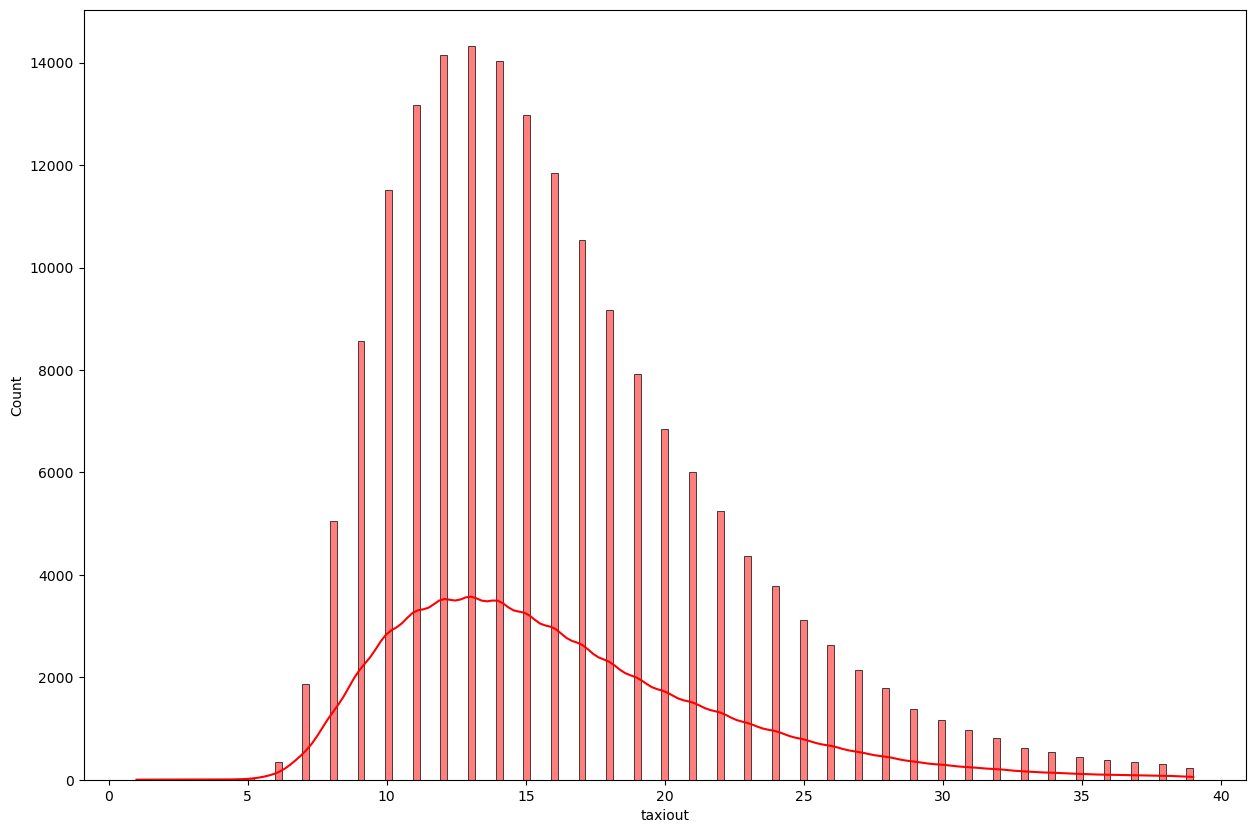

In [27]:
fig, axs = plt.subplots(figsize=(15, 10))
sns.histplot(data=SAN_flights, x='taxiout', kde=True, color='red',  ax=axs)
# sns.histplot(data=SAN_flights, x='taxiin', kde=True, color='blue',  ax=axs[1])

In [28]:
SAN_flights['dep_day'] = pd.to_datetime(SAN_flights['actual_departure_dttm']).dt.day_name()
SAN_flights['dep_day_num'] = pd.to_datetime(SAN_flights['actual_departure_dttm']).dt.weekday
SAN_flights['dep_hour'] = pd.to_datetime(SAN_flights['actual_departure_dttm']).dt.hour

In [29]:
SAN_flights

,airline,flightno,origin,dest,totalseatcount,generalacft,depgate,arrgate,scheduled_departure_dttm,scheduled_arrival_dttm,...,actual_arrival_dttm,airtime,taxiout,taxiin,depvariance,arrvariance,internationalflag,dep_day,dep_day_num,dep_hour
0,AC,1886,SAN,YYZ,174,32S,034,F36,2018-01-01 11:40:00,2018-01-01 19:11:00,...,2018-01-01 21:14:00,251.0,34.0,26.0,83.0,123.0,1,Monday,0,13
1,WN,6418,SAN,TUS,143,737,8,A3,2018-01-01 21:55:00,2018-01-02 00:10:00,...,2018-01-02 00:36:00,50.0,12.0,4.0,35.0,26.0,0,Monday,0,22
2,AS,3456,SAN,STL,76,EMJ,18,C15,2018-01-01 09:40:00,2018-01-01 15:02:00,...,2018-01-01 15:04:00,189.0,14.0,4.0,-3.0,2.0,0,Monday,0,9
3,WN,552,SAN,SMF,143,737,8,B15,2018-01-01 19:10:00,2018-01-01 20:45:00,...,2018-01-01 21:19:00,67.0,15.0,4.0,43.0,34.0,0,Monday,0,19
4,WN,983,SAN,SMF,143,737,1A,B17,2018-01-01 15:05:00,2018-01-01 16:40:00,...,2018-01-01 16:43:00,70.0,14.0,4.0,10.0,3.0,0,Monday,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188520,WN,6380,SAN,MCI,175,737,8,41,2018-12-30 18:55:00,2018-12-30 23:55:00,...,2018-12-30 23:47:00,156.0,13.0,6.0,-3.0,-8.0,0,Sunday,6,18
188521,WN,6526,SAN,SMF,143,737,10,B17,2018-12-30 12:15:00,2018-12-30 13:55:00,...,2018-12-30 13:50:00,76.0,16.0,5.0,-2.0,-5.0,0,Sunday,6,12
188522,WN,6564,SAN,SJD,143,737,10,13,2018-12-30 10:25:00,2018-12-30 13:40:00,...,2018-12-30 13:41:00,106.0,27.0,7.0,-4.0,1.0,1,Sunday,6,10
188523,WN,6618,SAN,AUS,143,737,7,16,2018-12-30 20:40:00,2018-12-31 01:20:00,...,2018-12-31 02:08:00,140.0,19.0,7.0,42.0,48.0,0,Sunday,6,21


In [30]:
SAN_flights['day_of_week_sin'] = np.sin(2 * np.pi * SAN_flights['dep_day_num'] / 7)
SAN_flights['day_of_week_cos'] = np.cos(2 * np.pi * SAN_flights['dep_day_num'] / 7)

In [31]:
def hash_feature(series, n_bins):
    return series.apply(lambda x: hash(x) % n_bins)

n_bins = 10

SAN_flights['airline_hashed'] = hash_feature(SAN_flights['airline'], n_bins)

## 2. Exploratory Data Analysis

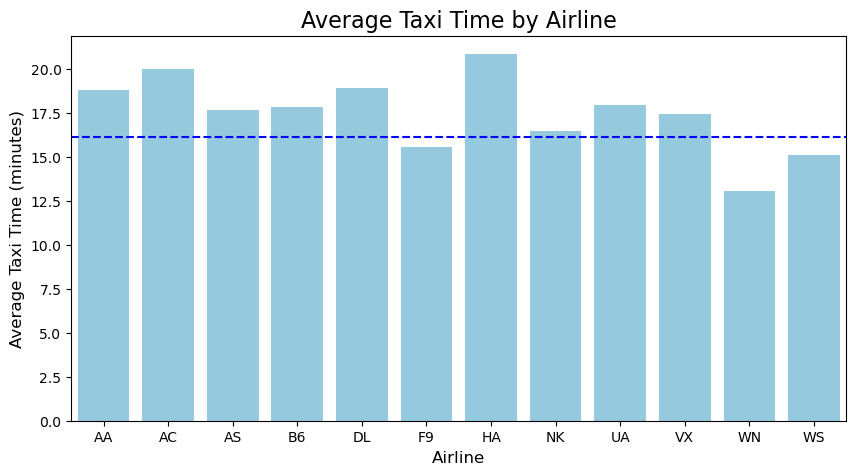

In [32]:
data = SAN_flights[['airline','taxiout']]

Average_taxitime_airline = data.groupby('airline')['taxiout'].mean().reset_index()

overall_avg = data['taxiout'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x='airline', y='taxiout', data=Average_taxitime_airline, color='skyblue')
plt.axhline(y=overall_avg, color='blue', linestyle='--', label=f'Overall Avg: {overall_avg:.2f} min')

plt.title('Average Taxi Time by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Taxi Time (minutes)', fontsize=12)

plt.show()

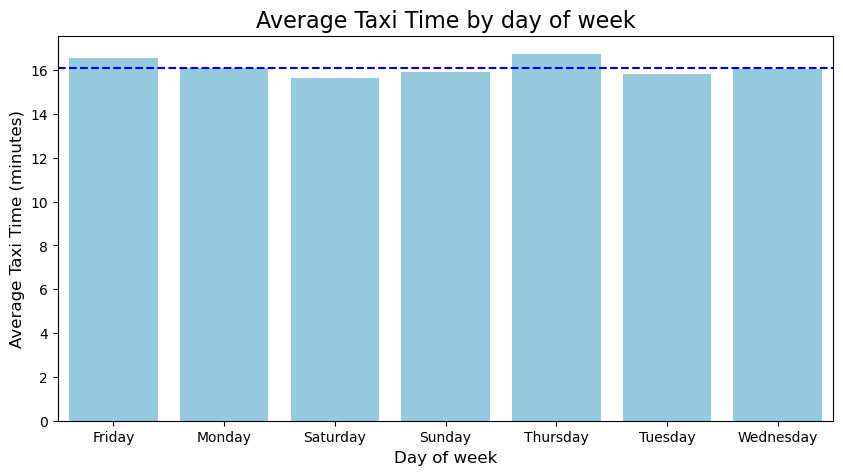

In [33]:
data = SAN_flights[['dep_day','taxiout']]

Average_taxitime_airline = data.groupby('dep_day')['taxiout'].mean().reset_index()

overall_avg = data['taxiout'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x='dep_day', y='taxiout', data=Average_taxitime_airline, color='skyblue')
plt.axhline(y=overall_avg, color='blue', linestyle='--', label=f'Overall Avg: {overall_avg:.2f} min')

plt.title('Average Taxi Time by day of week', fontsize=16)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Average Taxi Time (minutes)', fontsize=12)

plt.show()

/var/folders/kc/klx_7jq14yz4kqywvhhh3hz40000gn/T/ipykernel_79080/2402980333.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_day_time['time_of_day'] = data_day_time['dep_hour'].apply(time_of_day)


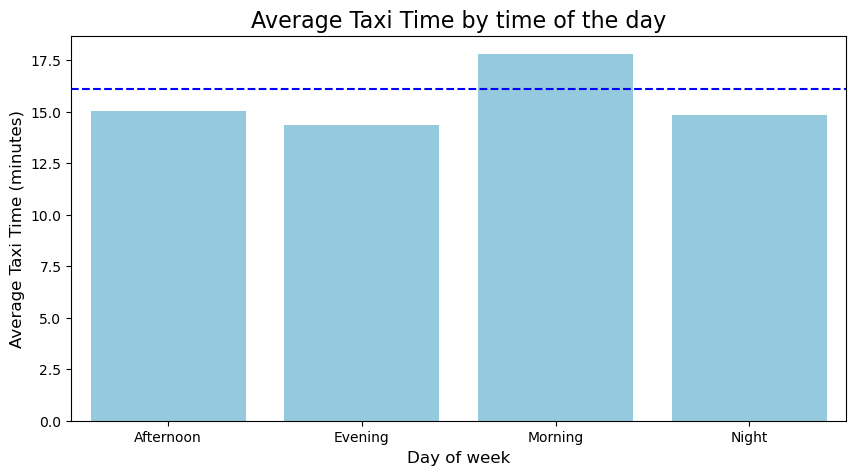

In [34]:
data_day_time = SAN_flights[['dep_hour','taxiout', 'dep_day']]

# Morning: 4 AM to 12 PM
# Afternoon: 12 PM to 5 PM
# Evening: 5 PM to 9 PM
# Night: After 9 PM

def time_of_day(hour):
    if 4 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data_day_time['time_of_day'] = data_day_time['dep_hour'].apply(time_of_day)

Average_taxitime = data_day_time.groupby('time_of_day')['taxiout'].mean().reset_index()
overall_avg = data_day_time['taxiout'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x='time_of_day', y='taxiout', data=Average_taxitime, color='skyblue')
plt.axhline(y=overall_avg, color='blue', linestyle='--', label=f'Overall Avg: {overall_avg:.2f} min')

plt.title('Average Taxi Time by time of the day', fontsize=16)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Average Taxi Time (minutes)', fontsize=12)

plt.show()

/var/folders/kc/klx_7jq14yz4kqywvhhh3hz40000gn/T/ipykernel_79080/2827735394.py:1: FutureWarning: The provided callable <function mean at 0x1079a99e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = data_day_time.pivot_table(values='taxiout', index='dep_day', columns='time_of_day', aggfunc=np.mean)


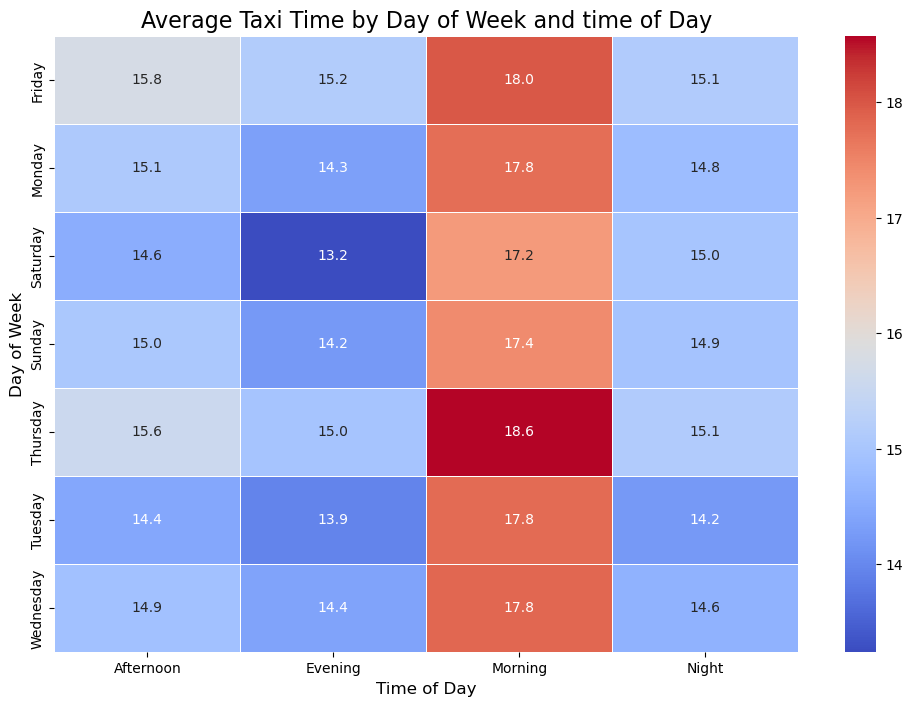

In [35]:
heatmap_data = data_day_time.pivot_table(values='taxiout', index='dep_day', columns='time_of_day', aggfunc=np.mean)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)

# Adding title and labels
plt.title('Average Taxi Time by Day of Week and time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)

# Show the plot
plt.show()

/var/folders/kc/klx_7jq14yz4kqywvhhh3hz40000gn/T/ipykernel_79080/683339416.py:1: FutureWarning: The provided callable <function mean at 0x1079a99e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = data_day_time.pivot_table(values='taxiout', index='dep_day', columns='dep_hour', aggfunc=np.mean)


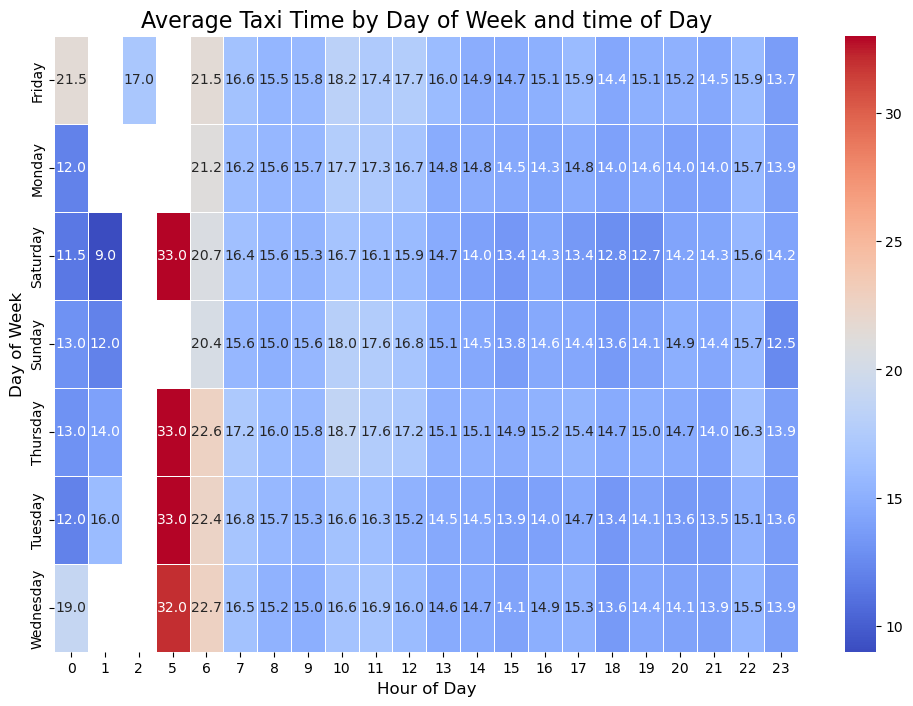

In [36]:
heatmap_data = data_day_time.pivot_table(values='taxiout', index='dep_day', columns='dep_hour', aggfunc=np.mean)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)

# Adding title and labels
plt.title('Average Taxi Time by Day of Week and time of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)

# Show the plot
plt.show()

In [37]:

SAN_flights['actual_departure_dttm'] = pd.to_datetime(SAN_flights['actual_departure_dttm'])

# Sort the data by time
SAN_flights = SAN_flights.sort_values('actual_departure_dttm')

# Calculate rolling window counts within a given time window
SAN_flights['dep_within_5min'] = SAN_flights.rolling('5T', on='actual_departure_dttm').actual_departure_dttm.count()
SAN_flights['dep_within_10min'] = SAN_flights.rolling('10T', on='actual_departure_dttm').actual_departure_dttm.count()
SAN_flights['dep_within_15min'] = SAN_flights.rolling('15T', on='actual_departure_dttm').actual_departure_dttm.count()
SAN_flights['dep_within_20min'] = SAN_flights.rolling('20T', on='actual_departure_dttm').actual_departure_dttm.count()
SAN_flights['dep_within_25min'] = SAN_flights.rolling('25T', on='actual_departure_dttm').actual_departure_dttm.count()
SAN_flights['dep_within_30min'] = SAN_flights.rolling('30T', on='actual_departure_dttm').actual_departure_dttm.count()
SAN_flights['dep_within_60min'] = SAN_flights.rolling('60T', on='actual_departure_dttm').actual_departure_dttm.count()

SAN_flights


/var/folders/kc/klx_7jq14yz4kqywvhhh3hz40000gn/T/ipykernel_79080/160470644.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  SAN_flights['dep_within_5min'] = SAN_flights.rolling('5T', on='actual_departure_dttm').actual_departure_dttm.count()
/var/folders/kc/klx_7jq14yz4kqywvhhh3hz40000gn/T/ipykernel_79080/160470644.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  SAN_flights['dep_within_10min'] = SAN_flights.rolling('10T', on='actual_departure_dttm').actual_departure_dttm.count()
/var/folders/kc/klx_7jq14yz4kqywvhhh3hz40000gn/T/ipykernel_79080/160470644.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  SAN_flights['dep_within_15min'] = SAN_flights.rolling('15T', on='actual_departure_dttm').actual_departure_dttm.count()
/var/folders/kc/klx_7jq14yz4kqywvhhh3hz40000gn/T/ipykernel_79080/160470644.py:10: FutureWarning:

,airline,flightno,origin,dest,totalseatcount,generalacft,depgate,arrgate,scheduled_departure_dttm,scheduled_arrival_dttm,...,day_of_week_sin,day_of_week_cos,airline_hashed,dep_within_5min,dep_within_10min,dep_within_15min,dep_within_20min,dep_within_25min,dep_within_30min,dep_within_60min
2321,F9,552,SAN,DEN,138,32S,12,A42,2017-01-01 06:20:00,2017-01-01 09:57:00,...,-0.781831,0.62349,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3132,UA,1100,SAN,IAH,167,737,39,C30,2017-01-01 06:15:00,2017-01-01 11:28:00,...,-0.781831,0.62349,5,2.0,2.0,2.0,2.0,2.0,2.0,2.0
953,AA,6022,SAN,LAX,76,EMJ,32,60C,2017-01-01 06:20:00,2017-01-01 07:25:00,...,-0.781831,0.62349,1,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2275,UA,751,SAN,EWR,152,737,41,C111,2017-01-01 06:15:00,2017-01-01 14:29:00,...,-0.781831,0.62349,5,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2272,UA,400,SAN,SFO,120,32S,45,63,2017-01-01 06:15:00,2017-01-01 07:58:00,...,-0.781831,0.62349,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188362,UA,1916,SAN,IAD,179,737,45,C19,2018-12-31 22:00:00,2019-01-01 05:34:00,...,0.000000,1.00000,5,1.0,1.0,1.0,1.0,1.0,1.0,6.0
179895,AS,378,SAN,BWI,178,737,14,D20,2018-12-31 22:40:00,2019-01-01 06:39:00,...,0.000000,1.00000,7,1.0,1.0,2.0,2.0,2.0,2.0,5.0
188155,DL,1099,SAN,ATL,192,32S,38,A20,2018-12-31 22:40:00,2019-01-01 05:38:00,...,0.000000,1.00000,5,1.0,2.0,2.0,2.0,3.0,3.0,5.0
188340,AA,2078,SAN,PHL,187,32S,26,C24,2018-12-31 22:45:00,2019-01-01 06:49:00,...,0.000000,1.00000,1,2.0,3.0,3.0,3.0,4.0,4.0,6.0


In [38]:
SAN_flights.to_csv('SAN_flights_1.csv', index=False)

<Axes: xlabel='taxiout', ylabel='dep_within_5min'>

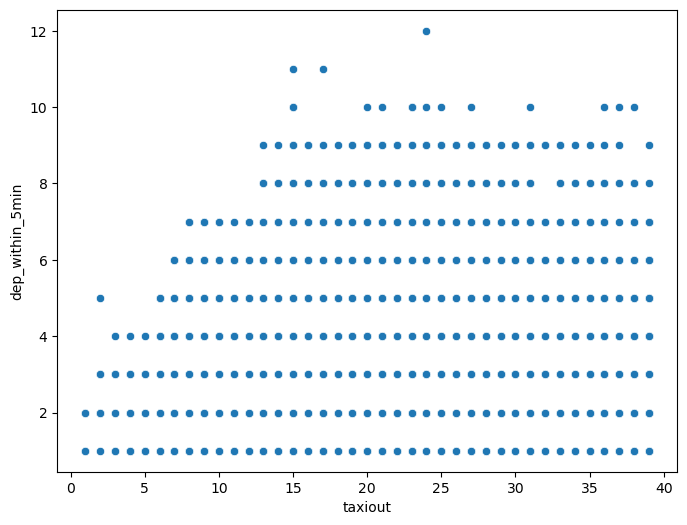

In [39]:
data_dep_cnt = SAN_flights[['dep_within_5min', 'taxiout']]


plt.figure(figsize=(8, 6))
sns.scatterplot(x='taxiout', y='dep_within_5min', data=data_dep_cnt)
                            # , 'dep_within_10min', 'dep_within_15min', 'dep_within_20min',
                            # 'dep_within_25min', 'dep_within_30min', 'dep_within_60min', 'taxiout']]

# Average_taxitime_airline = data.groupby('dep_within_5min')['taxiout'].mean().reset_index()
# sns.pairplot(data_dep_cnt, palette = 'husl')

<Axes: xlabel='taxiout', ylabel='dep_within_60min'>

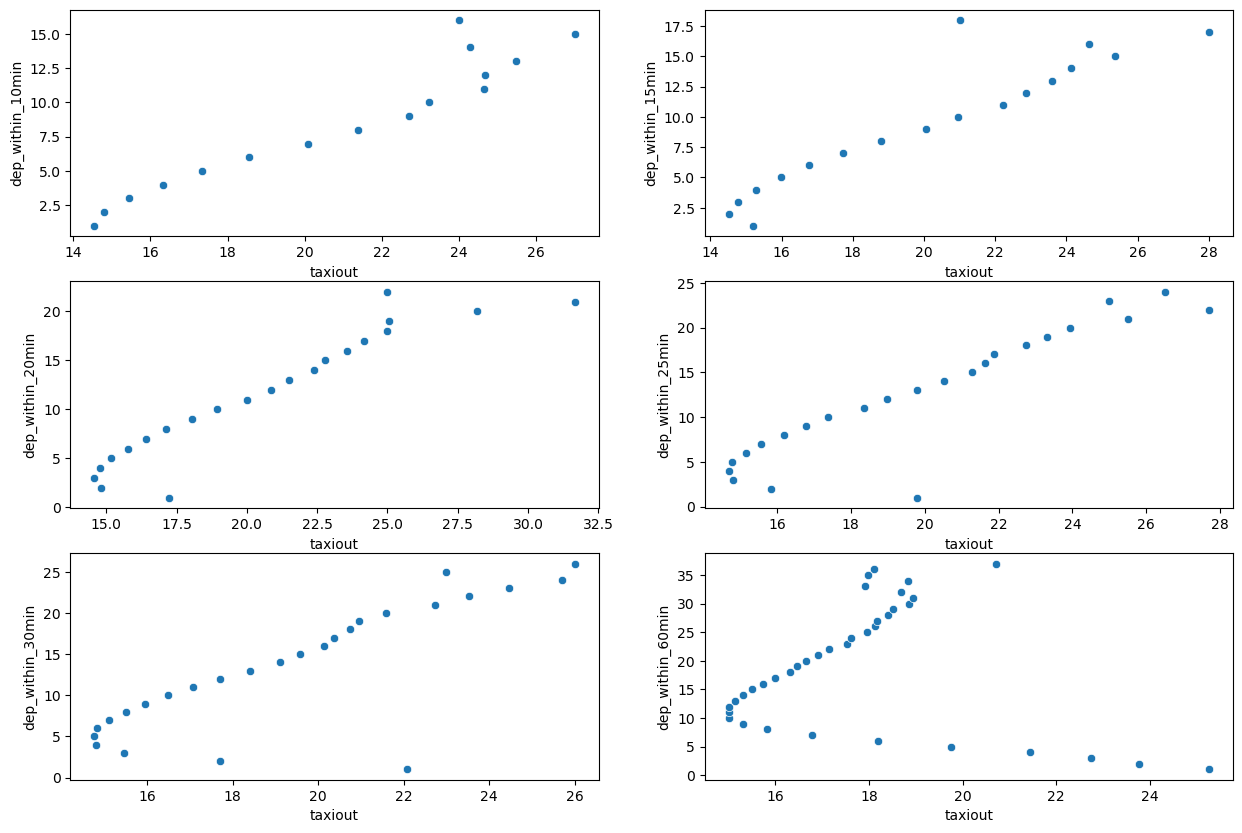

In [40]:
data_dep_cnt10 = SAN_flights[['dep_within_10min', 'taxiout']]
dep_within_10min = data_dep_cnt10.groupby('dep_within_10min')['taxiout'].mean().reset_index()

data_dep_cnt15 = SAN_flights[['dep_within_15min', 'taxiout']]
dep_within_15min = data_dep_cnt15.groupby('dep_within_15min')['taxiout'].mean().reset_index()

data_dep_cnt20 = SAN_flights[['dep_within_20min', 'taxiout']]
dep_within_20min = data_dep_cnt20.groupby('dep_within_20min')['taxiout'].mean().reset_index()

data_dep_cnt25 = SAN_flights[['dep_within_25min', 'taxiout']]
dep_within_25min = data_dep_cnt25.groupby('dep_within_25min')['taxiout'].mean().reset_index()

data_dep_cnt30 = SAN_flights[['dep_within_30min', 'taxiout']]
dep_within_30min = data_dep_cnt30.groupby('dep_within_30min')['taxiout'].mean().reset_index()

data_dep_cnt60 = SAN_flights[['dep_within_60min', 'taxiout']]
dep_within_60min = data_dep_cnt60.groupby('dep_within_60min')['taxiout'].mean().reset_index()

fig, axs = plt.subplots(3,2, figsize=(15, 10))
sns.scatterplot(x='taxiout', y='dep_within_10min', data=dep_within_10min, ax=axs[0,0])
sns.scatterplot(x='taxiout', y='dep_within_15min', data=dep_within_15min, ax=axs[0,1])
sns.scatterplot(x='taxiout', y='dep_within_20min', data=dep_within_20min, ax=axs[1,0])
sns.scatterplot(x='taxiout', y='dep_within_25min', data=dep_within_25min, ax=axs[1,1])
sns.scatterplot(x='taxiout', y='dep_within_30min', data=dep_within_30min, ax=axs[2,0])
sns.scatterplot(x='taxiout', y='dep_within_60min', data=dep_within_60min, ax=axs[2,1])